## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

![Image Description](download.jpg)

## Business Scope

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## IMPORT MODULES AND LOAD DATA

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

#  fetch data
table_names_query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = pd.read_sql_query(table_names_query, conn)
print("Tables in the database:", table_names)


Tables in the database:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [2]:
db = """ 
SELECT * FROM movie_basics
 """
db = pd.read_sql_query(db, conn)
db.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
db1 = """ 
SELECT * FROM movie_ratings
"""
df = pd.read_sql_query(db1, conn)
df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
#combine both tables
joined_query = """
SELECT mb.*, mr.*
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
"""
joined_db = pd.read_sql_query(joined_query, conn)

joined_db.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [49]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [50]:
#import csv file
data_csv = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_csv.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## DATA CLEANING

In [51]:
#let's start with the tables
joined_db.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In [52]:
joined_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [80]:
budget['release_date'] = pd.to_datetime(budget['release_date'], format='%b %d, %Y')

In [53]:
#let's remove the rows with missing values
cleaned_db = joined_db.dropna(subset=['runtime_minutes', 'genres'])
cleaned_db.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

In [54]:
budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [55]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [56]:
#Let's convert some to float/int
budget['production_budget'] = budget['production_budget' ].str.strip('$')
budget['worldwide_gross'] = budget['worldwide_gross' ].str.strip('$')
budget['domestic_gross'] = budget['domestic_gross' ].str.strip('$')

budget['production_budget'] = budget['production_budget'].str.replace(',', '').astype(float)
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '').astype(float) 
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '').astype(float)    

In [57]:
#Now let's clean the csv file
data_csv.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [58]:
data_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [59]:
#conver foreign gross to float
data_csv['foreign_gross'] = data_csv['foreign_gross'].str.replace(',', '').astype(float)
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [60]:
data_csv.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [61]:
#drop rows with missing values
data_csv = data_csv.dropna()
data_csv.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [77]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   totalgross         5782 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 316.3+ KB


## EDA

In [62]:
#add revenues
budget['totalgross'] = budget['domestic_gross'] + budget['worldwide_gross']

In [63]:
data_csv.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [64]:
cleaned_db.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [65]:
#change format for numbers in numvotes
def format_number(num):
    return '{:.0f}'.format(num)

cleaned_db['numvotes'] = cleaned_db['numvotes'].apply(format_number)
cleaned_db.describe()

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_11020\2748224774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_db['numvotes'] = cleaned_db['numvotes'].apply(format_number)


,start_year,runtime_minutes,averagerating
count,65720.000000,65720.000000,65720.000000
mean,2014.258065,94.732273,6.320902
std,2.600143,209.377017,1.458878
min,2010.000000,3.000000,1.000000
25%,2012.000000,81.000000,5.500000
50%,2014.000000,91.000000,6.500000
75%,2016.000000,104.000000,7.300000
max,2019.000000,51420.000000,10.000000


the Average movie runtime is 94.7 minutes. Let's try to compare the rating and the runtime of the movies.
the correlation between runtime and rating can be visualized using a scatter plot.

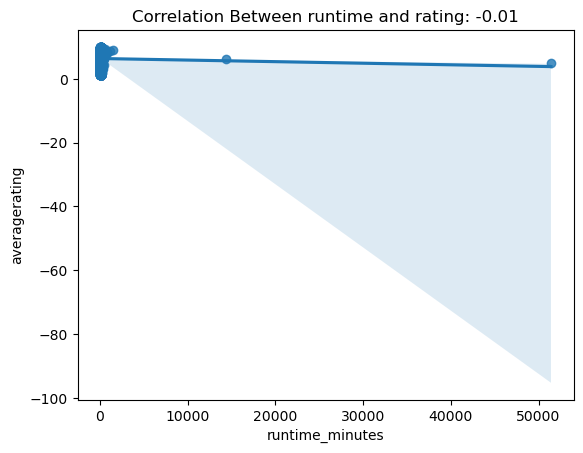

In [66]:
#lets look for correlation 
correlation = cleaned_db['runtime_minutes'].corr(cleaned_db['averagerating'])
sns.regplot(x='runtime_minutes', y='averagerating', data=cleaned_db)
plt.title('Correlation Between runtime and rating: {:.2f}'.format(correlation))
plt.show()

The correlation coefficient is -0.01, indicating a very weak negative correlation. This means that as the runtime increases, the average rating slightly decreases, but the relationship is almost negligible. In simpler terms, the length of runtime has almost no impact on the average rating. The data points are mostly clustered near the origin, with one outlier far along the horizontal axis, suggesting that most items have short runtimes and similar ratings, with very few exceptions

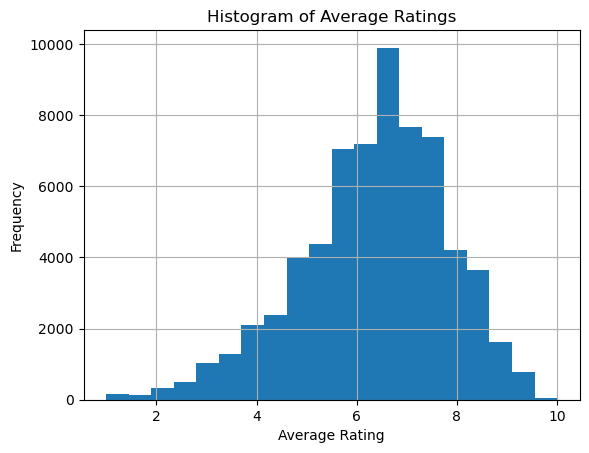

In [67]:
#let's plot a histogram for Ratings
cleaned_db['averagerating'].hist(bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings')
plt.show()

Most of the bars are concentrated around the center, indicating that most ratings fall within a middle range. This suggests that the data likely follows a normal distribution, meaning that the majority of ratings are average, with fewer ratings at the extreme low or high ends.

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_11020\655586737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_db['numvotes'] = cleaned_db['numvotes'].astype(float)
C:\Users\Marijoise\AppData\Local\Temp\ipykernel_11020\655586737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_db['numvotes_thousands'] = cleaned_db['numvotes'] / 1000


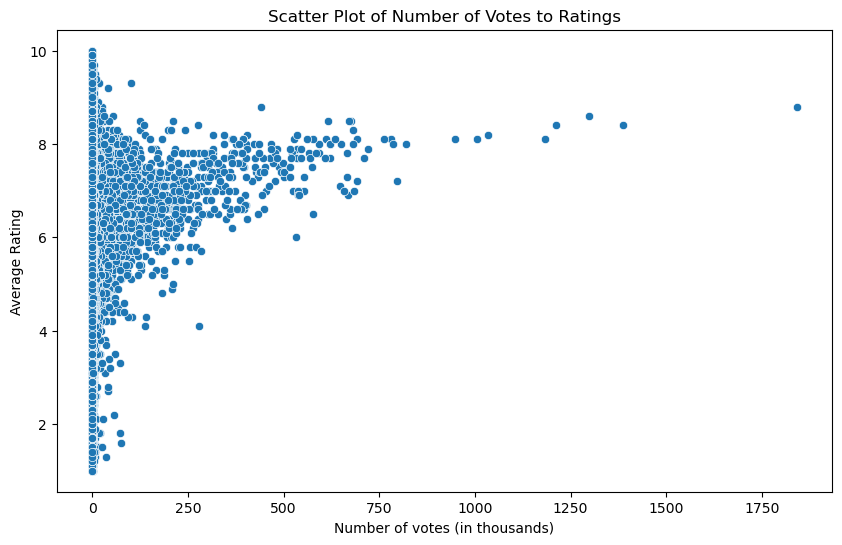

In [68]:
# let's see if the number of votes affects the ratings
#lets change number of votes to a float
cleaned_db['numvotes'] = cleaned_db['numvotes'].astype(float)

#first for clear reading
cleaned_db['numvotes_thousands'] = cleaned_db['numvotes'] / 1000
plt.figure(figsize=(10, 6))
# so does number of votes affect the ratings
sns.scatterplot(x='numvotes_thousands', y='averagerating', data=cleaned_db)
plt.title('Scatter Plot of Number of Votes to Ratings')
plt.xlabel('Number of votes (in thousands)')
plt.ylabel('Average Rating')
plt.show()

Dense Clustering Near Origin: Most items have a low number of votes and varying ratings. This suggests that many items are not widely rated, which is common in datasets where a few items are very popular, and many are less known.

Trend with Higher Votes: As the number of votes increases, the points spread out. There is a general trend where items with higher numbers of votes tend to have higher average ratings. This could indicate that more popular items are generally better received.

Variation Across Ratings: Even among items with high vote counts, there is a spread across the rating spectrum. This shows that while popularity (number of votes) can correlate with higher ratings, it is not a strict rule, and there are exceptions.
This analysis can help in understanding how the popularity of an item (measured by the number of votes) relates to its perceived quality (measured by average rating). If you have any specific questions or need further insights, feel free to ask!

In [69]:
# let's remain with 1 main type of genre in the genre column
cleaned_db['genres'] = cleaned_db['genres'].str.split(',', expand=True)[0]

cleaned_db

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_11020\3675630187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_db['genres'] = cleaned_db['genres'].str.split(',', expand=True)[0]


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,numvotes_thousands
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,tt0063540,7.0,77.0,0.077
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,tt0066787,7.2,43.0,0.043
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,4.517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,tt0100275,6.5,119.0,0.119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Adventure,tt0137204,8.1,263.0,0.263
...,...,...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,8.4,365.0,0.365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,tt9913056,6.2,5.0,0.005
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6.0,0.006
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,tt9914286,8.7,136.0,0.136


In [70]:
#let's sort from highest to lowest in averagerating
cleaned_db = cleaned_db.sort_values(by='averagerating', ascending=False)
cleaned_db

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,numvotes_thousands
878,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,Comedy,tt10378660,10.0,5.0,0.005
53689,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,tt5390098,10.0,5.0,0.005
42970,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,tt4109192,10.0,6.0,0.006
65755,tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,70.0,Documentary,tt7227500,10.0,6.0,0.006
60782,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,tt6295832,10.0,5.0,0.005
...,...,...,...,...,...,...,...,...,...,...
44554,tt4280842,Mr. Home,Mr. Home,2014,70.0,Comedy,tt4280842,1.0,126.0,0.126
49011,tt4837074,Ritoru Kyouta no bouken,Ritoru Kyouta no bouken,2017,82.0,Adventure,tt4837074,1.0,174.0,0.174
23379,tt2370036,On BorrowedTime,On BorrowedTime,2012,60.0,Documentary,tt2370036,1.0,9.0,0.009
49798,tt4932436,"Girls, Dance with the Dead",Onna no ko yo shitai to odore,2015,70.0,Comedy,tt4932436,1.0,385.0,0.385


In [71]:
#let's Identify genre's with the an average rating of 9
genre_ratings = cleaned_db.loc[cleaned_db['averagerating'] >= 9, 'genres'].value_counts().index.tolist()

genre_ratings_counte = cleaned_db.loc[cleaned_db['averagerating'] >= 9, 'genres'].value_counts().values.tolist()

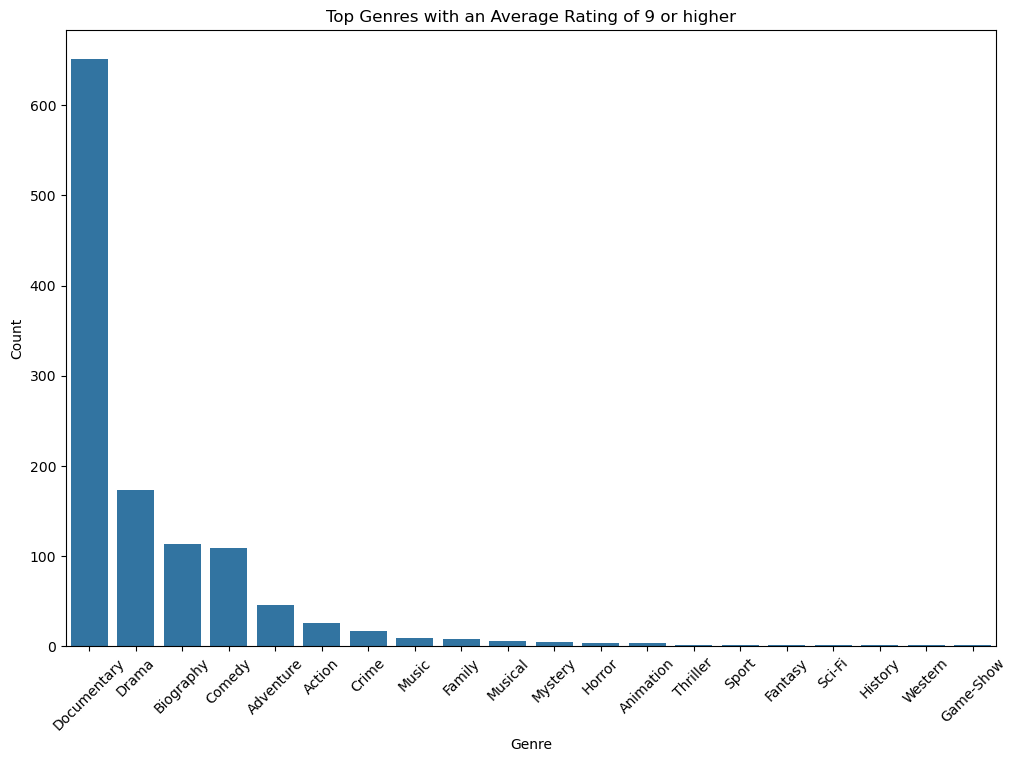

In [72]:
# lets plot

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_ratings, y=genre_ratings_counte)
plt.title('Top Genres with an Average Rating of 9 or higher')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Appparently the big three are Documentary, Drama and Biography

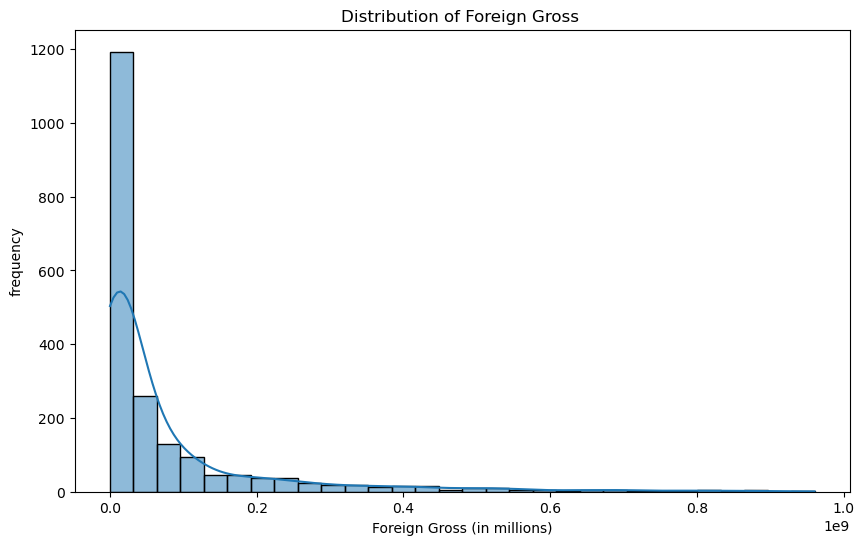

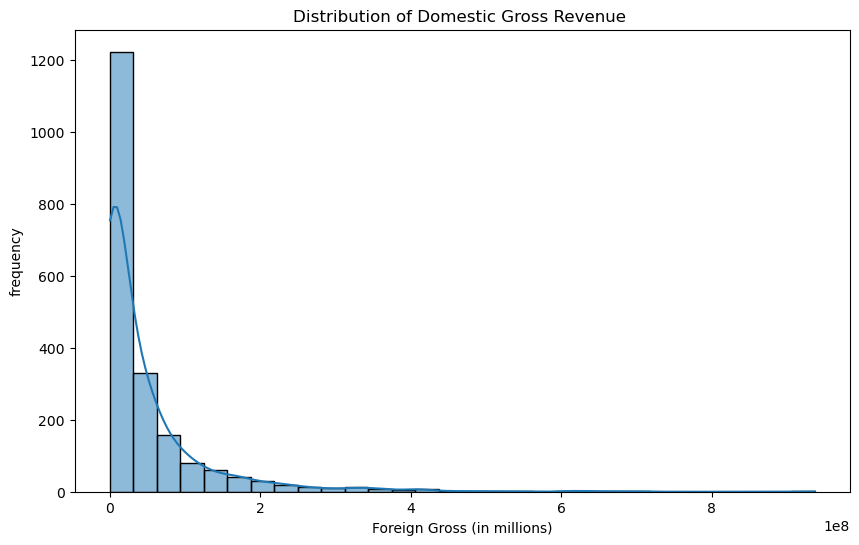

In [73]:
#Let's plot for revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_csv['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Foreign Gross ')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_csv['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Domestic Gross Revenue ')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('frequency')
plt.show()

High Frequency at Lower Revenues: Most movies earn lower  gross revenues.

Decreasing Frequency: As the gross revenue increases, the number of movies earning that amount decreases.

Right Skew: The histogram you provided seems to have a right skew, as the majority of the data (movies) are concentrated on the lower end of the  gross revenue scale, with a few movies earning significantly higher amounts12.

Implications: This skewness indicates that while most movies earn lower gross revenues, there are some outliers that earn much higher amounts, pulling the mean to the right.

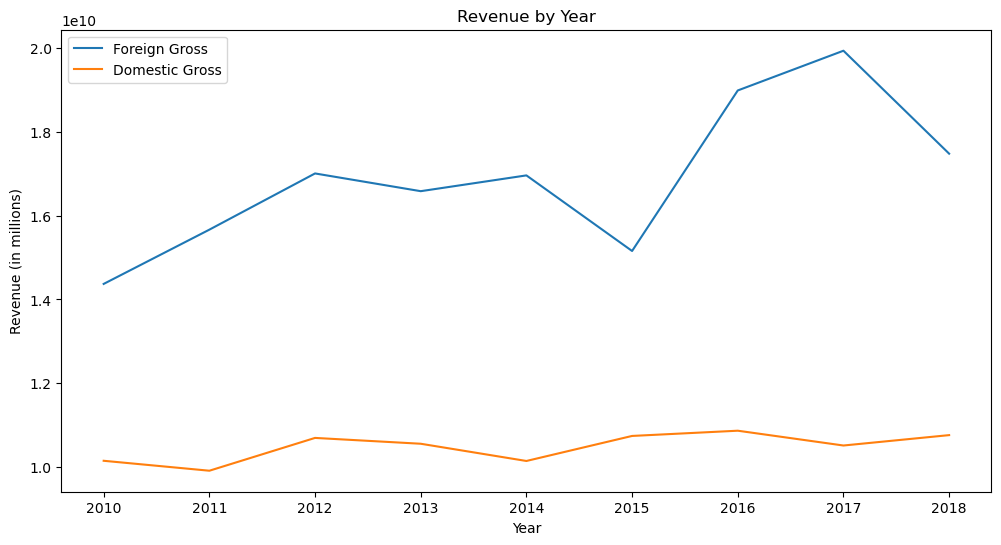

In [74]:
#we can see revenue by year
#Group by year 
revenue_by_year = data_csv.groupby('year').sum().reset_index()
#let's plot

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='foreign_gross', data=revenue_by_year, label='Foreign Gross')
sns.lineplot(x='year', y='domestic_gross', data=revenue_by_year, label='Domestic Gross')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.legend()
plt.show()

Foreign Gross (Blue Line): This line shows significant fluctuations. It peaks around 2014, dips, and then rises again, reaching its highest point in 2017. This indicates that foreign revenue experienced variability and overall growth during this period.

Domestic Gross (Orange Line): This line remains relatively flat, suggesting that domestic revenue stayed stable over the years without much change.

We can attribute the high numbers of foreign revenue from the fact that its a lot fo countries combined

Text(0, 0.5, 'Revenue (in millions)')

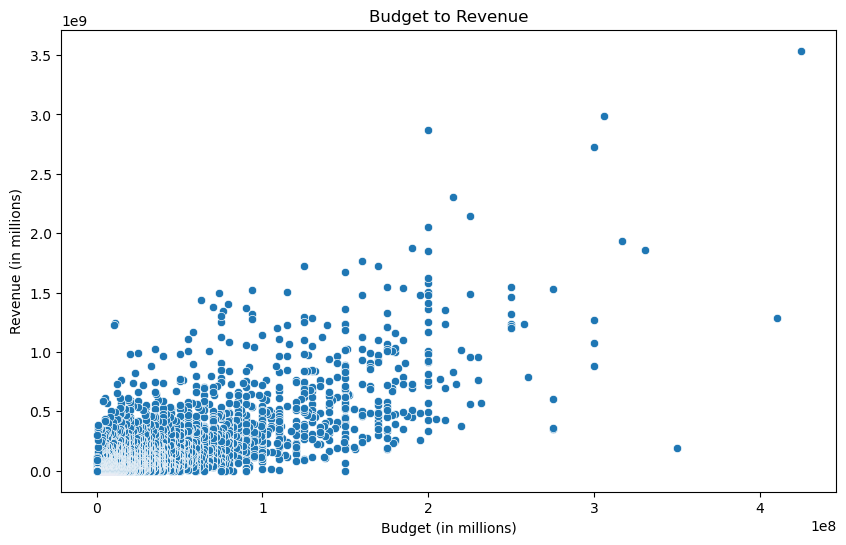

In [78]:
#let's see if budget affects the revenue
#let's plot a scatter plot for budget and revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='totalgross', data=budget)
plt.title('Budget to Revenue')
plt.xlabel('Budget (in millions)')
plt.ylabel('Revenue (in millions)')

No Clear Trend: The scatter plot indicates that there isn’t a consistent increase in revenue with a higher budget. This suggests that spending more on a movie’s budget does not guarantee higher "revenue.

Data Points: Each blue dot represents a movie, showing its budget and corresponding revenue.

## Conclusion


* The budget doesn't guarantee a higher revenue. This shows us wee need to be careful in how much we add
  to the budget because we can get serious losses.

* Runtime doesn't affect the ratings of the movie, people are more immersed with the content not he time
 it takes away

* Documentary, Drama and Biography are the genres with the highest average ratings. This means also that a lot of the voters enjoy watching this kind of shows



## Recommendations


* Focus on movies with a runtime of 120 minutes or more, as they are more likely to have a longer runtime and thus more potential for a higher rating.

* Be sure to choose a movie with a budget of at least $100 million, as this will give you a good starting point for your movie.

* Keep a watch on the popularity of your movie (number of votes), as it can help you make sure it is a hit.

* Be sure to choose a movie with a genre that is not too popular (like drama, comedy, or romance), as it will make your movie more appealing to a wider audience. A well balanced movie can have a great success.